In [1]:
import os
import json
from typing import Dict, List, Optional, Union, cast
import requests
import pandas as pd

import unicodedata
import re
import json

import acquire

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression 


from math import sqrt
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filter="ignore"

from bs4 import BeautifulSoup
import prepare
import plotly.express as px


***

# `Acquire` Data.

In [2]:
df = acquire.get_fifa_data()

# `Explore` And `Prep` Data

In [3]:
#forces dataframe to show every columns
pd.set_option('display.max_columns', None)
df

sofifa_id                                         player_url  \
0          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
1         158023  https://sofifa.com/player/158023/lionel-messi/...   
2         190871  https://sofifa.com/player/190871/neymar-da-sil...   
3         155862  https://sofifa.com/player/155862/sergio-ramos-...   
4         176580  https://sofifa.com/player/176580/luis-suarez/1...   
...          ...                                                ...   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   
53632     234069  https://sofifa.com/player/234069/alex-atkinson...   
53633     234353  https://sofifa.com/player/234353/josh-venney/1...   
53634     234733  https://sofifa.com/player/234733/max-wright/17...   

              short_name                            long_name  \
0      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
1               L. Messi       Lionel Andrés Messi Cuccittini   
2                 Neymar        Neymar da Silva Santos Júnior   
3           Sergio Ramos                  Sergio Ramos García   
4              L. Suárez             Luis Alberto Suárez Díaz   
...                  ...                                  ...   
53630        S. Sargeant           Sam Joseph Dennis Sargeant   
53631          D. McGoey                         Dylan McGoey   
53632        A. Atkinson                        Alex Atkinson   
53633          J. Venney                          Josh Venney   
53634          M. Wright                           Max Wright   

      player_positions  overall  potential    value_eur  wage_eur  age  \
0               ST, LW       94         94   77000000.0  400000.0   33   
1           CF, RW, ST       94         94  110500000.0  575000.0   31   
2                   LW       92         93  118500000.0  300000.0   26   
3                   CB       91         91   51000000.0  375000.0   32   
4                   ST       91         91   80000000.0  450000.0   31   
...                ...      ...        ...          ...       ...  ...   
53630               GK       45         64      60000.0    1000.0   18   
53631               GK       45         64      60000.0     500.0   18   
53632     CAM, CM, CDM       45         63      70000.0    2000.0   18   
53633               CM       45         62      70000.0    1000.0   19   
53634               RW       45         63      70000.0    1000.0   18   

              dob  height_cm  weight_kg  club_team_id            club_name  \
0      1985-02-05        187         83          45.0             Juventus   
1      1987-06-24        170         72         241.0         FC Barcelona   
2      1992-02-05        175         68          73.0  Paris Saint-Germain   
3      1986-03-30        184         82         243.0       Real Madrid CF   
4      1987-01-24        182         86         241.0         FC Barcelona   
...           ...        ...        ...           ...                  ...   
53630  1997-09-23        183         67        1958.0        Leyton Orient   
53631  1997-11-08        185         80        1586.0        Longford Town   
53632  1997-12-23        183         70        1923.0           Luton Town   
53633  1997-02-09        165         60          92.0         Grimsby Town   
53634  1998-04-06        170         76          92.0         Grimsby Town   

                          league_name  league_level club_position  \
0                     Italian Serie A           1.0            ST   
1              Spain Primera Division           1.0            RW   
2                      French Ligue 1           1.0            LW   
3              Spain Primera Division           1.0           LCB   
4              Spain Primera Division           1.0            ST   
...                               ...           ...           ...   
53630              English League Two           4.0           SU

In [4]:
#add 0 values to non goal keeper players
#df['goalkeeping_speed'].fillna("0", inplace = True)

In [5]:
#forces dataframe to show every columns
pd.set_option('display.max_columns', None)

***

# Columns That Have Null Values

In [6]:
na = df.isna().sum() > 0
na[na]

value_eur                    True
wage_eur                     True
club_team_id                 True
club_name                    True
league_name                  True
league_level                 True
club_position                True
club_jersey_number           True
club_loaned_from             True
club_joined                  True
club_contract_valid_until    True
nation_team_id               True
nation_position              True
nation_jersey_number         True
release_clause_eur           True
player_tags                  True
player_traits                True
pace                         True
shooting                     True
passing                      True
dribbling                    True
defending                    True
physic                       True
goalkeeping_speed            True
club_logo_url                True
club_flag_url                True
nation_logo_url              True
dtype: bool

`Takeaways:`
- Over 25 columns have null values and we need to address them.

***

## Taking a look at our null values:

# `value_eur`,`wage_eur`, & `club_team_id`.

In [7]:
df[df.value_eur.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52561     139479  https://sofifa.com/player/139479/gareth-ainswo...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52561  G. Ainsworth                Gareth Ainsworth               RM       54   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52561         54        NaN    2000.0   43  1973-05-10        178         79   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id          club_name         league_name  league_level  \
422             NaN                NaN                 NaN           NaN   
507             NaN                NaN                 NaN           NaN   
592             NaN                NaN                 NaN           NaN   
593             NaN                NaN                 NaN           NaN   
698             NaN                NaN                 NaN           NaN   
...             ...                ...                 ...           ...   
52561        1933.0  Wycombe Wanderers  English League Two           4.0   
52578           NaN                NaN                 NaN           NaN   
52990           NaN                NaN                 NaN           NaN   
53191           NaN                NaN                 NaN           NaN   
53211           NaN                NaN                 NaN           NaN   

      club_position  club_jersey_number club_loaned_from club_joined  \
422             NaN                 NaN              NaN         NaN   
507             NaN                 NaN              NaN         NaN   
592             NaN                 NaN              NaN         NaN   
593             NaN

`Takeaways:`
- we might have to consider removing these players because they would corrupt our data considering their wage information is missing and would not add any value to our model.

In [8]:
df[df.wage_eur.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52495     234507  https://sofifa.com/player/234507/mohammed-rafi...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52495    M. Rafique                Mohammed Rafique               CM       55   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52495         62        NaN       NaN   23  1992-09-20        173         67   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id club_name league_name  league_level club_position  \
422             NaN       NaN         NaN           NaN           NaN   
507             NaN       NaN         NaN           NaN           NaN   
592             NaN       NaN         NaN           NaN           NaN   
593             NaN       NaN         NaN           NaN           NaN   
698             NaN       NaN         NaN           NaN           NaN   
...             ...       ...         ...           ...           ...   
52495           NaN       NaN         NaN           NaN           NaN   
52578           NaN       NaN         NaN           NaN           NaN   
52990           NaN       NaN         NaN           NaN           NaN   
53191           NaN       NaN         NaN           NaN           NaN   
53211           NaN       NaN         NaN           NaN           NaN   

       club_jersey_number club_loaned_from club_joined  \
422                   NaN              NaN         NaN   
507                   NaN              NaN         NaN   
592                   NaN              NaN         NaN   
593                   NaN              NaN         NaN   
698                   NaN              NaN         Na

`Takeaways:`
- we might have to consider removing these players because they would corrupt our data considering their value information is missing and would not add any value to our model.

In [9]:
df[df.club_team_id.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52495     234507  https://sofifa.com/player/234507/mohammed-rafi...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52495    M. Rafique                Mohammed Rafique               CM       55   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52495         62        NaN       NaN   23  1992-09-20        173         67   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id club_name league_name  league_level club_position  \
422             NaN       NaN         NaN           NaN           NaN   
507             NaN       NaN         NaN           NaN           NaN   
592             NaN       NaN         NaN           NaN           NaN   
593             NaN       NaN         NaN           NaN           NaN   
698             NaN       NaN         NaN           NaN           NaN   
...             ...       ...         ...           ...           ...   
52495           NaN       NaN         NaN           NaN           NaN   
52578           NaN       NaN         NaN           NaN           NaN   
52990           NaN       NaN         NaN           NaN           NaN   
53191           NaN       NaN         NaN           NaN           NaN   
53211           NaN       NaN         NaN           NaN           NaN   

       club_jersey_number club_loaned_from club_joined  \
422                   NaN              NaN         NaN   
507                   NaN              NaN         NaN   
592                   NaN              NaN         NaN   
593                   NaN              NaN         NaN   
698                   NaN              NaN         Na

`Takeaways:`
- we might have to consider removing these players because there club id is important information that we need to conclude their club budget.

In [10]:
df[df.league_name.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52495     234507  https://sofifa.com/player/234507/mohammed-rafi...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52495    M. Rafique                Mohammed Rafique               CM       55   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52495         62        NaN       NaN   23  1992-09-20        173         67   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id club_name league_name  league_level club_position  \
422             NaN       NaN         NaN           NaN           NaN   
507             NaN       NaN         NaN           NaN           NaN   
592             NaN       NaN         NaN           NaN           NaN   
593             NaN       NaN         NaN           NaN           NaN   
698             NaN       NaN         NaN           NaN           NaN   
...             ...       ...         ...           ...           ...   
52495           NaN       NaN         NaN           NaN           NaN   
52578           NaN       NaN         NaN           NaN           NaN   
52990           NaN       NaN         NaN           NaN           NaN   
53191           NaN       NaN         NaN           NaN           NaN   
53211           NaN       NaN         NaN           NaN           NaN   

       club_jersey_number club_loaned_from club_joined  \
422                   NaN              NaN         NaN   
507                   NaN              NaN         NaN   
592                   NaN              NaN         NaN   
593                   NaN              NaN         NaN   
698                   NaN              NaN         Na

`Takeaways:`
- we might have to consider removing these players because the leage that they play in is important and can give us valuable information that needs to be categorized.

# `club_position`, `club_joined`, & `club_contract_valid_until`.

In [11]:
df[df.club_position.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52495     234507  https://sofifa.com/player/234507/mohammed-rafi...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52495    M. Rafique                Mohammed Rafique               CM       55   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52495         62        NaN       NaN   23  1992-09-20        173         67   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id club_name league_name  league_level club_position  \
422             NaN       NaN         NaN           NaN           NaN   
507             NaN       NaN         NaN           NaN           NaN   
592             NaN       NaN         NaN           NaN           NaN   
593             NaN       NaN         NaN           NaN           NaN   
698             NaN       NaN         NaN           NaN           NaN   
...             ...       ...         ...           ...           ...   
52495           NaN       NaN         NaN           NaN           NaN   
52578           NaN       NaN         NaN           NaN           NaN   
52990           NaN       NaN         NaN           NaN           NaN   
53191           NaN       NaN         NaN           NaN           NaN   
53211           NaN       NaN         NaN           NaN           NaN   

       club_jersey_number club_loaned_from club_joined  \
422                   NaN              NaN         NaN   
507                   NaN              NaN         NaN   
592                   NaN              NaN         NaN   
593                   NaN              NaN         NaN   
698                   NaN              NaN         Na

In [12]:
df[df.club_joined.isnull()]

sofifa_id                                         player_url  \
29        167664  https://sofifa.com/player/167664/gonzalo-higua...   
38        198710  https://sofifa.com/player/198710/james-rodrigu...   
95        187961  https://sofifa.com/player/187961/jose-paulo-be...   
189       207410  https://sofifa.com/player/207410/mateo-kovacic...   
279       202685  https://sofifa.com/player/202685/simone-zaza/1...   
...          ...                                                ...   
53173     232817  https://sofifa.com/player/232817/ignacio-chicc...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   
53251     235718  https://sofifa.com/player/235718/mustafa-al-mo...   
53439     232371  https://sofifa.com/player/232371/wataru-hashim...   

          short_name                         long_name  player_positions  \
29        G. Higuaín           Gonzalo Gerardo Higuaín                ST   
38      J. Rodríguez       James David Rodríguez Rubio       CAM, CM, RM   
95          Paulinho  José Paulo Bezzera Maciel Júnior  CM, CAM, CDM, RM   
189       M. Kovačić                     Mateo Kovačić                CM   
279          S. Zaza                       Simone Zaza                ST   
...              ...                               ...               ...   
53173      I. Chicco          Ignacio Francisco Chicco                GK   
53191       S. Passi                      Sumeet Passi                ST   
53211       K. Singh        Konsham Chinglensana Singh                CB   
53251  M. Al Mousawi                Mustafa Al Mousawi            ST, LM   
53439   W. Hashimoto                              橋本 和                LB   

       overall  potential   value_eur  wage_eur  age         dob  height_cm  \
29          88         88  57000000.0  225000.0   30  1987-12-10        186   
38          88         89  69500000.0  170000.0   26  1991-07-12        181   
95          85         85  37000000.0   40000.0   29  1988-07-25        181   
189         83         89  35000000.0  120000.0   24  1994-05-06        178   
279         82         83  26000000.0   70000.0   27  1991-06-25        186   
...        ...        ...         ...       ...  ...         ...        ...   
53173       52         66    100000.0    1000.0   20  1996-06-30        185   
53191       52         61         NaN       NaN   21  1995-04-18        175   
53211       52         61         NaN       NaN   19  1996-11-23        190   
53251       52         63     90000.0    2000.0   21  1995-02-01        176   
53439       50         50     25000.0    1000.0   29  1986-09-14        181   

       weight_kg  club_team_id               club_name  \
29            89          47.0                AC Milan   
38            78          21.0       FC Bayern München   
95            81      111839.0            Guangzhou FC   
189           78           5.0                 Chelsea   
279           84          54.0             Torino F.C.   
...          ...           ...                     ...   
53173         80      112670.0  Club Atlético Talleres   
53191         65           NaN                     NaN   
53211         79           NaN                     NaN   
53251         70      112883.0              Al Khaleej   
53439         72      101146.0             Vissel Kobe   

                         league_name  league_level club_position  \
29                   Italian Serie A           1.0            ST   
38              German 1. Bundesliga           1.0           LCM   
95              Chinese Super League           1.0           LDM   
189           English Premier League           1.0           SUB   
279                  Italian Serie A           1.0            RS   
...                              ...           ...           ...   
53173     Argentina Primera División           1.0           SUB   
53191                            NaN           NaN 

In [13]:
df[df.club_contract_valid_until.isnull()]

sofifa_id                                         player_url  \
422       156713  https://sofifa.com/player/156713/andreas-granq...   
507       207439  https://sofifa.com/player/207439/leandro-pared...   
592       187347  https://sofifa.com/player/187347/igor-smolniko...   
593       187457  https://sofifa.com/player/187457/christian-nob...   
698       229909  https://sofifa.com/player/229909/andrey-lunev/...   
...          ...                                                ...   
52495     234507  https://sofifa.com/player/234507/mohammed-rafi...   
52578     208481  https://sofifa.com/player/208481/karanjit-sing...   
52990     234509  https://sofifa.com/player/234509/fulganco-card...   
53191     233526  https://sofifa.com/player/233526/sumeet-passi/...   
53211     234508  https://sofifa.com/player/234508/konsham-singh...   

         short_name                       long_name player_positions  overall  \
422    A. Granqvist               Andreas Granqvist               CB       80   
507      L. Paredes          Leandro Daniel Paredes          CM, CDM       80   
592    I. Smolnikov                  Igor Smolnikov               RB       79   
593        C. Noboa  Christian Fernando Noboa Tello          CM, CDM       79   
698        A. Lunev                    Andrey Lunev               GK       79   
...             ...                             ...              ...      ...   
52495    M. Rafique                Mohammed Rafique               CM       55   
52578      K. Singh                  Karanjit Singh               GK       54   
52990    F. Cardozo                Fulganco Cardozo               CB       53   
53191      S. Passi                    Sumeet Passi               ST       52   
53211      K. Singh      Konsham Chinglensana Singh               CB       52   

       potential  value_eur  wage_eur  age         dob  height_cm  weight_kg  \
422           80        NaN       NaN   33  1985-04-16        192         84   
507           85        NaN       NaN   24  1994-06-29        180         75   
592           79        NaN       NaN   29  1988-08-08        178         70   
593           79        NaN       NaN   33  1985-04-09        183         75   
698           81        NaN       NaN   26  1991-11-13        189         80   
...          ...        ...       ...  ...         ...        ...        ...   
52495         62        NaN       NaN   23  1992-09-20        173         67   
52578         54        NaN       NaN   30  1986-01-08        182         86   
52990         53        NaN       NaN   28  1988-01-23        183         76   
53191         61        NaN       NaN   21  1995-04-18        175         65   
53211         61        NaN       NaN   19  1996-11-23        190         79   

       club_team_id club_name league_name  league_level club_position  \
422             NaN       NaN         NaN           NaN           NaN   
507             NaN       NaN         NaN           NaN           NaN   
592             NaN       NaN         NaN           NaN           NaN   
593             NaN       NaN         NaN           NaN           NaN   
698             NaN       NaN         NaN           NaN           NaN   
...             ...       ...         ...           ...           ...   
52495           NaN       NaN         NaN           NaN           NaN   
52578           NaN       NaN         NaN           NaN           NaN   
52990           NaN       NaN         NaN           NaN           NaN   
53191           NaN       NaN         NaN           NaN           NaN   
53211           NaN       NaN         NaN           NaN           NaN   

       club_jersey_number club_loaned_from club_joined  \
422                   NaN              NaN         NaN   
507                   NaN              NaN         NaN   
592                   NaN              NaN         NaN   
593                   NaN              NaN         NaN   
698                   NaN              NaN         Na

`takeaways:`
- Club_position, club_joined, & club_contract_valid_until all seem to have similar payers with null values.
- We will be dropping these rows to better benefit our exploration and our modeling.

# `nation_team_id`, `nation_position`.

In [14]:
df[df.nation_team_id.isnull()]

sofifa_id                                         player_url  \
5         177003  https://sofifa.com/player/177003/luka-modric/1...   
17        168542  https://sofifa.com/player/168542/david-josue-j...   
26          1179  https://sofifa.com/player/1179/gianluigi-buffo...   
27        162835  https://sofifa.com/player/162835/samir-handano...   
28        164240  https://sofifa.com/player/164240/thiago-emilia...   
...          ...                                                ...   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   
53632     234069  https://sofifa.com/player/234069/alex-atkinson...   
53633     234353  https://sofifa.com/player/234353/josh-venney/1...   
53634     234733  https://sofifa.com/player/234733/max-wright/17...   

          short_name                   long_name player_positions  overall  \
5          L. Modrić                 Luka Modrić          CM, CDM       91   
17       David Silva   David Josué Jiménez Silva          CAM, CM       89   
26         G. Buffon            Gianluigi Buffon               GK       88   
27     S. Handanovič            Samir Handanovič               GK       88   
28      Thiago Silva    Thiago Emiliano da Silva               CB       88   
...              ...                         ...              ...      ...   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   
53632    A. Atkinson               Alex Atkinson     CAM, CM, CDM       45   
53633      J. Venney                 Josh Venney               CM       45   
53634      M. Wright                  Max Wright               RW       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
5             91  67000000.0  425000.0   32  1985-09-09        172         66   
17            89  51500000.0  275000.0   32  1986-01-08        173         67   
26            88   4000000.0   80000.0   40  1978-01-28        192         92   
27            88  30000000.0  110000.0   33  1984-07-14        193         92   
28            88  24000000.0  160000.0   33  1984-09-22        183         82   
...          ...         ...       ...  ...         ...        ...        ...   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   
53632         63     70000.0    2000.0   18  1997-12-23        183         70   
53633         62     70000.0    1000.0   19  1997-02-09        165         60   
53634         63     70000.0    1000.0   18  1998-04-06        170         76   

       club_team_id            club_name                     league_name  \
5             243.0       Real Madrid CF          Spain Primera Division   
17             10.0      Manchester City          English Premier League   
26             73.0  Paris Saint-Germain                  French Ligue 1   
27             44.0                Inter                 Italian Serie A   
28             73.0  Paris Saint-Germain                  French Ligue 1   
...             ...                  ...                             ...   
53630        1958.0        Leyton Orient              English League Two   
53631        1586.0        Longford Town  Rep. Ireland Airtricity League   
53632        1923.0           Luton Town              English League Two   
53633          92.0         Grimsby Town              English League Two   
53634          92.0         Grimsby Town              English League Two   

       league_level club_position  club_jersey_number club_loaned_from  \
5               1.0           RCM                10.0              NaN   
17              1.0           LCM                21.0              NaN   
26              1.0            GK                 1.0              NaN   
27              1.0            GK  

In [15]:
df[df.nation_position.isnull()]

sofifa_id                                         player_url  \
5         177003  https://sofifa.com/player/177003/luka-modric/1...   
17        168542  https://sofifa.com/player/168542/david-josue-j...   
26          1179  https://sofifa.com/player/1179/gianluigi-buffo...   
27        162835  https://sofifa.com/player/162835/samir-handano...   
28        164240  https://sofifa.com/player/164240/thiago-emilia...   
...          ...                                                ...   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   
53632     234069  https://sofifa.com/player/234069/alex-atkinson...   
53633     234353  https://sofifa.com/player/234353/josh-venney/1...   
53634     234733  https://sofifa.com/player/234733/max-wright/17...   

          short_name                   long_name player_positions  overall  \
5          L. Modrić                 Luka Modrić          CM, CDM       91   
17       David Silva   David Josué Jiménez Silva          CAM, CM       89   
26         G. Buffon            Gianluigi Buffon               GK       88   
27     S. Handanovič            Samir Handanovič               GK       88   
28      Thiago Silva    Thiago Emiliano da Silva               CB       88   
...              ...                         ...              ...      ...   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   
53632    A. Atkinson               Alex Atkinson     CAM, CM, CDM       45   
53633      J. Venney                 Josh Venney               CM       45   
53634      M. Wright                  Max Wright               RW       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
5             91  67000000.0  425000.0   32  1985-09-09        172         66   
17            89  51500000.0  275000.0   32  1986-01-08        173         67   
26            88   4000000.0   80000.0   40  1978-01-28        192         92   
27            88  30000000.0  110000.0   33  1984-07-14        193         92   
28            88  24000000.0  160000.0   33  1984-09-22        183         82   
...          ...         ...       ...  ...         ...        ...        ...   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   
53632         63     70000.0    2000.0   18  1997-12-23        183         70   
53633         62     70000.0    1000.0   19  1997-02-09        165         60   
53634         63     70000.0    1000.0   18  1998-04-06        170         76   

       club_team_id            club_name                     league_name  \
5             243.0       Real Madrid CF          Spain Primera Division   
17             10.0      Manchester City          English Premier League   
26             73.0  Paris Saint-Germain                  French Ligue 1   
27             44.0                Inter                 Italian Serie A   
28             73.0  Paris Saint-Germain                  French Ligue 1   
...             ...                  ...                             ...   
53630        1958.0        Leyton Orient              English League Two   
53631        1586.0        Longford Town  Rep. Ireland Airtricity League   
53632        1923.0           Luton Town              English League Two   
53633          92.0         Grimsby Town              English League Two   
53634          92.0         Grimsby Town              English League Two   

       league_level club_position  club_jersey_number club_loaned_from  \
5               1.0           RCM                10.0              NaN   
17              1.0           LCM                21.0              NaN   
26              1.0            GK                 1.0              NaN   
27              1.0            GK  

`Takeaways:`
- Number of Nulls missing is greater than %90 so we will be eliminating these columns.

***

# `pace`, `shooting`,`dribbling`, `passing`, `defending`, `physic`.

In [16]:
df[df.pace.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

In [17]:
df[df.shooting.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

In [18]:
df[df.passing.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

In [19]:
df[df.dribbling.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

In [20]:
df[df.defending.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

In [21]:
df[df.physic.isnull()]

sofifa_id                                         player_url  \
8         193080  https://sofifa.com/player/193080/david-de-gea-...   
9         167495  https://sofifa.com/player/167495/manuel-neuer/...   
13        192119  https://sofifa.com/player/192119/thibaut-court...   
14        200389  https://sofifa.com/player/200389/jan-oblak/190002   
20        192448  https://sofifa.com/player/192448/marc-andre-te...   
...          ...                                                ...   
53626     214725  https://sofifa.com/player/214725/sam-ramsbotto...   
53627     223621  https://sofifa.com/player/223621/dean-mahon/17...   
53629     228581  https://sofifa.com/player/228581/ben-kelly/170002   
53630     228582  https://sofifa.com/player/228582/sam-sargeant/...   
53631     232965  https://sofifa.com/player/232965/dylan-mcgoey/...   

          short_name                   long_name player_positions  overall  \
8             De Gea       David De Gea Quintana               GK       91   
9           M. Neuer          Manuel Peter Neuer               GK       90   
13       T. Courtois            Thibaut Courtois               GK       90   
14          J. Oblak                   Jan Oblak               GK       90   
20     M. ter Stegen       Marc-André ter Stegen               GK       89   
...              ...                         ...              ...      ...   
53626  S. Ramsbottom              Sam Ramsbottom               GK       45   
53627       D. Mahon                  Dean Mahon               GK       45   
53629       B. Kelly                   Ben Kelly               GK       45   
53630    S. Sargeant  Sam Joseph Dennis Sargeant               GK       45   
53631      D. McGoey                Dylan McGoey               GK       45   

       potential   value_eur  wage_eur  age         dob  height_cm  weight_kg  \
8             93  72000000.0  250000.0   27  1990-11-07        193         76   
9             90  44000000.0  130000.0   32  1986-03-27        193         92   
13            91  62000000.0  250000.0   26  1992-05-11        199         96   
14            93  68000000.0   90000.0   25  1993-01-07        188         87   
20            92  58000000.0  250000.0   26  1992-04-30        187         85   
...          ...         ...       ...  ...         ...        ...        ...   
53626         56     50000.0     500.0   20  1996-04-03        185         80   
53627         59     60000.0     500.0   18  1997-10-26        183         75   
53629         54     35000.0     500.0   18  1997-07-26        183         82   
53630         64     60000.0    1000.0   18  1997-09-23        183         67   
53631         64     60000.0     500.0   18  1997-11-08        185         80   

       club_team_id           club_name                     league_name  \
8              11.0   Manchester United          English Premier League   
9              21.0   FC Bayern München            German 1. Bundesliga   
13            243.0      Real Madrid CF          Spain Primera Division   
14            240.0  Atlético de Madrid          Spain Primera Division   
20            241.0        FC Barcelona          Spain Primera Division   
...             ...                 ...                             ...   
53626        1571.0       Galway United  Rep. Ireland Airtricity League   
53627         305.0         Bohemian FC  Rep. Ireland Airtricity League   
53629         837.0          Dundalk FC  Rep. Ireland Airtricity League   
53630        1958.0       Leyton Orient              English League Two   
53631        1586.0       Longford Town  Rep. Ireland Airtricity League   

       league_level club_position  club_jersey_number club_loaned_from  \
8               1.0            GK                 1.0              NaN   
9               1.0            GK                 1.0              NaN   
13              1.0           SUB                25.0              NaN   
14              1.0            GK              

`Takeaways:`
- Most of these null values are for goal keepers and can be replaced with 0 because these skills are not a requirement for their career field.

***

# Import [Prepare.py](https://github.com/Jules-Ray-Kayla-Bert-Capstone-FiFA/fifa/blob/main/prepare.py) File.
`Summary:`
    This file was created with the purpose of cleaning, encoding, scaling, dropping, and adding collumns to our existing data. It is necessary to complete this preperation step before we start exploring and modeling our data.

In [22]:
#defining df as our imported prepped data.
df = prepare.prepped_data(df)
df

Before dropping nulls, 53635 rows, 111 cols
After dropping nulls. 49417 rows. 66 cols
After dropping leagues. 36744 rows. 79 cols


sofifa_id         short_name player_positions  overall  potential  \
0          20801  Cristiano Ronaldo           ST, LW       94         94   
1         158023           L. Messi       CF, RW, ST       94         94   
2         190871             Neymar               LW       92         93   
3         155862       Sergio Ramos               CB       91         91   
4         176580          L. Suárez               ST       91         91   
...          ...                ...              ...      ...        ...   
53625     212270           M. Foden               GK       45         59   
53626     214725      S. Ramsbottom               GK       45         56   
53627     223621           D. Mahon               GK       45         59   
53629     228581           B. Kelly               GK       45         54   
53631     232965          D. McGoey               GK       45         64   

         value_eur  wage_eur  age  height_cm  weight_kg  club_team_id  \
0       77000000.0  400000.0   33        187         83          45.0   
1      110500000.0  575000.0   31        170         72         241.0   
2      118500000.0  300000.0   26        175         68          73.0   
3       51000000.0  375000.0   32        184         82         243.0   
4       80000000.0  450000.0   31        182         86         241.0   
...            ...       ...  ...        ...        ...           ...   
53625      70000.0    1000.0   20        180         80         631.0   
53626      50000.0     500.0   20        185         80        1571.0   
53627      60000.0     500.0   18        183         75         305.0   
53629      35000.0     500.0   18        183         82         837.0   
53631      60000.0     500.0   18        185         80        1586.0   

                 club_name                     league_name  nationality_id  \
0                 Juventus                 Italian Serie A              38   
1             FC Barcelona          Spain Primera Division              52   
2      Paris Saint-Germain                  French Ligue 1              54   
3           Real Madrid CF          Spain Primera Division              45   
4             FC Barcelona          Spain Primera Division              60   
...                    ...                             ...             ...   
53625       Ross County FC            Scottish Premiership              42   
53626        Galway United  Rep. Ireland Airtricity League              14   
53627          Bohemian FC  Rep. Ireland Airtricity League              25   
53629           Dundalk FC  Rep. Ireland Airtricity League              25   
53631        Longford Town  Rep. Ireland Airtricity League              25   

          nationality_name club_position          position club_joined  \
0                 Portugal            ST           Striker  2018-07-10   
1                Argentina            RW        Right Wing  2004-07-01   
2                   Brazil            LW         Left Wing  2017-08-03   
3                    Spain           LCB  Left Centre Back  2005-08-01   
4                  Uruguay            ST           Striker  2014-07-11   
...                    ...           ...               ...         ...   
53625             Scotland           SUB        Substitute  2016-03-02   
53626              England           SUB        Substitute  2016-07-20   
53627  Republic of Ireland           SUB        Substitute  2015-01-03   
53629  Republic of Ireland           SUB        Substitute  2014-10-08   
53631  Republic of Ireland           RES          Reserves  2016-01-01   

       club_contract_valid_until         body_type preferred_foot  weak_foot  \
0                         2022.0            Unique          Right          4   
1                         2021.0            Unique           Left          4   
2                         2022.0            Unique          Right          5   
3                         2020.0  Normal (170-185)          Right      

# `Explore`

## Importing split function to start our exploring on our train data.

In [23]:
#dropping goal keepers
df = df[df.player_positions != 'GK']
df

sofifa_id         short_name player_positions  overall  potential  \
0          20801  Cristiano Ronaldo           ST, LW       94         94   
1         158023           L. Messi       CF, RW, ST       94         94   
2         190871             Neymar               LW       92         93   
3         155862       Sergio Ramos               CB       91         91   
4         176580          L. Suárez               ST       91         91   
...          ...                ...              ...      ...        ...   
53606     232940           R. Maeda      CM, CDM, RB       47         55   
53608     233841          C. Cuesta               CB       47         67   
53612     236309          C. Sutton               CM       47         69   
53620     231611        K. Omolokun               CB       46         60   
53622     233818          R. Wilson          CM, CAM       46         67   

         value_eur  wage_eur  age  height_cm  weight_kg  club_team_id  \
0       77000000.0  400000.0   33        187         83          45.0   
1      110500000.0  575000.0   31        170         72         241.0   
2      118500000.0  300000.0   26        175         68          73.0   
3       51000000.0  375000.0   32        184         82         243.0   
4       80000000.0  450000.0   31        182         86         241.0   
...            ...       ...  ...        ...        ...           ...   
53606      50000.0    1000.0   22        172         65      101146.0   
53608      60000.0     500.0   17        178         67      101100.0   
53612      70000.0     500.0   18        180         75      111968.0   
53620      60000.0    1000.0   18        173         70          77.0   
53622      70000.0     500.0   17        184         75         445.0   

                 club_name                     league_name  nationality_id  \
0                 Juventus                 Italian Serie A              38   
1             FC Barcelona          Spain Primera Division              52   
2      Paris Saint-Germain                  French Ligue 1              54   
3           Real Madrid CF          Spain Primera Division              45   
4             FC Barcelona          Spain Primera Division              60   
...                    ...                             ...             ...   
53606          Vissel Kobe   Japanese J. League Division 1             163   
53608    Atlético Nacional         Colombian Liga Postobón              56   
53612       Wexford Youths  Rep. Ireland Airtricity League              25   
53620             Aberdeen            Scottish Premiership              14   
53622           Derry City  Rep. Ireland Airtricity League              35   

          nationality_name club_position          position club_joined  \
0                 Portugal            ST           Striker  2018-07-10   
1                Argentina            RW        Right Wing  2004-07-01   
2                   Brazil            LW         Left Wing  2017-08-03   
3                    Spain           LCB  Left Centre Back  2005-08-01   
4                  Uruguay            ST           Striker  2014-07-11   
...                    ...           ...               ...         ...   
53606                Japan           RES          Reserves  2013-01-07   
53608             Colombia           RES          Reserves  2016-04-24   
53612  Republic of Ireland           RES          Reserves  2016-01-01   
53620              England           RES          Reserves  2016-08-01   
53622     Northern Ireland           SUB        Substitute  2016-01-01   

       club_contract_valid_until         body_type preferred_foot  weak_foot  \
0                         2022.0            Unique          Right          4   
1                         2021.0            Unique           Left          4   
2                         2022.0            Unique          Right          5   
3                         2020.0  Normal (170-185)          Right      

In [24]:
df = df[df.year == 2017]

In [25]:
train ,validate, test = prepare.split(df)

Train: 7325 rows, 79 cols
Validate: 1832 rows, 79 cols
Test: 1617 rows, 79 cols


***
# Relationship to Wage_euro Plot

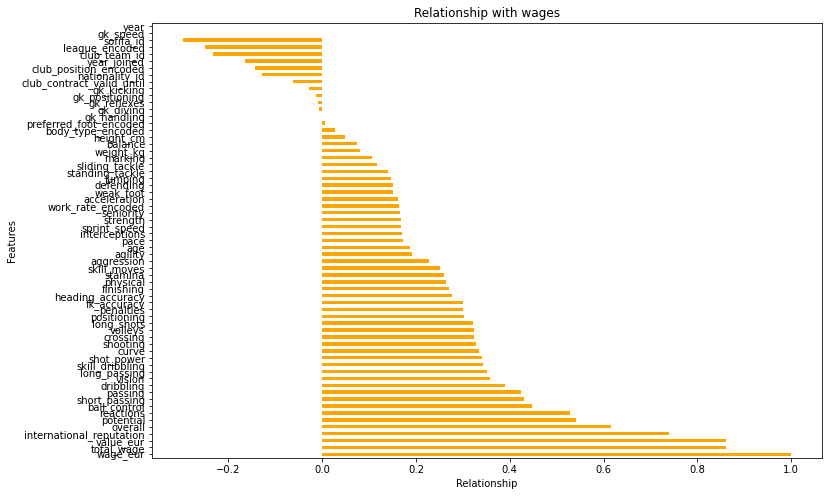

In [26]:
plt.figure(figsize = (12,8))
train.corr()['wage_eur'].sort_values(ascending=False).plot(kind='barh', color='orange')
plt.title('Relationship with wages')
plt.xlabel('Relationship')
plt.ylabel('Features')
plt.show()

In [27]:
features_cor =  train.corr()['wage_eur'].sort_values(ascending=False)
features_cor = pd.DataFrame(features_cor)
features_cor.tail(58)

wage_eur
potential                  0.541998
reactions                  0.528717
ball_control               0.446516
short_passing              0.430915
passing                    0.422925
dribbling                  0.388800
vision                     0.357387
long_passing               0.350990
skill_dribbling            0.343484
shot_power                 0.340469
curve                      0.335222
shooting                   0.327018
crossing                   0.324370
volleys                    0.322878
long_shots                 0.320696
positioning                0.303340
penalties                  0.300822
fk_accuracy                0.300217
heading_accuracy           0.277208
finishing                  0.269424
physical                   0.264504
stamina                    0.259669
skill_moves                0.250210
aggression                 0.228613
agility                    0.190585
age                        0.187188
pace                       0.171700
interceptions              0.170307
sprint_speed               0.168617
strength                   0.168415
seniority                  0.165425
work_rate_encoded          0.163801
acceleration               0.162274
weak_foot                  0.151797
defending                  0.151677
jumping                    0.146875
standing_tackle            0.139666
sliding_tackle             0.117322
marking                    0.105857
weight_kg                  0.080006
balance                    0.073738
height_cm                  0.047898
body_type_encoded          0.026968
preferred_foot_encoded     0.005300
gk_handling                0.000243
gk_diving                 -0.006913
gk_reflexes               -0.008753
gk_positioning            -0.012481
gk_kicking                -0.028133
club_contract_valid_until -0.061942
nationality_id            -0.128578
club_position_encoded     -0.143527
year_joined               -0.165425
club_team_id              -0.232458
league_encoded            -0.249823
sofifa_id                 -0.297754
gk_speed                        NaN
year                            NaN

## Questions to explore?

`Does age impact salary?`

`Does seniority(length of time playing with a club) impact salary?`

`Does the club you start with impact your salary?`

`Do players with unusual body types have higher or lower salaries?`

`Does nationality impact salary?`

`Does international reputation impact salary?`

`Does contract length positively or negatively impact salary?`

`Overarching question: What features are most important in player salaries?`

- Players to focus on for Eriberto Contreras?
- Additionally I will be focusing on team budgets?

In [90]:
fig = px.box(train, x="league_name", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wages and League', title_x=0.5)
fig.show()


In [29]:
fig = px.box(train, x="league_name", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage & League', title_x=0.5)
fig.show()

In [30]:
fig = px.box(train, x="club_name", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage & Club', title_x=0.5)
fig.show()


In [31]:
# df = px.data.gapminder().query("year").query("fifa_total_player_budget")
#train.loc[train['wage_eur'] < 2.6, 'country'] = 'top' # Represent only large countries
fig = px.pie(train, values='wage_eur', names='league_name', title='LEAGUE')
fig.show()

In [32]:
fig = px.box(train, x="age", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='WAGE & AGE', title_x=0.5)
fig.show()


In [33]:
fig = px.box(train, x="club_joined", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage Per Position', title_x=0.5)
fig.show()


In [34]:
#Does contract length positively or negatively impact salary?

fig = px.box(train, x="club_contract_valid_until", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage Per Position and contract ', title_x=0.5)
fig.show()

In [35]:
# identifying mvp columns
mvp = ['potential', 'reactions', 'vision', 'short_passing','long_passing',
                    'ball_control', 'curve', 'shot_power', 'volleys', 'long_shots',
                    'fk_accuracy', 'crossing', 'skill_dribbling']

In [36]:
X_train = train[mvp]
y_train = train['wage_eur']

X_validate = validate[mvp]
y_validate = validate['wage_eur']

X_test = test[mvp]
y_test = test['wage_eur']

In [37]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['potential', 'reactions', 'vision', 'short_passing','long_passing',
                    'ball_control', 'curve', 'shot_power', 'volleys', 'long_shots',
                    'fk_accuracy', 'crossing', 'skill_dribbling'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [38]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

# RMSE

In [39]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict price_pred_mean
wage_eur_pred_mean = y_train.wage_eur.mean()
# creating a wage_eur_pred_mean column for my y_train
y_train['wage_eur_pred_mean'] = y_train.wage_eur.mean()
# creating a wage_eur_pred_mean column for my y_validate
y_validate['wage_eur_pred_mean'] = y_validate.wage_eur.mean()
# 2. compute price_pred_median
# creating a predictive median for y train 
y_train['wage_eur_pred_median'] = y_train.wage_eur.median()
# creating a predictive median for y_validate
y_validate['wage_eur_pred_median'] = y_validate.wage_eur.median()
# 3. RMSE of price_pred_mean
rmse_train = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of wage_eur_pred_median
rmse_train = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  26563.58 
Validate/Out-of-Sample:  28143.86
RMSE using Median
Train/In-Sample:  27966.28 
Validate/Out-of-Sample:  29613.84


In [40]:
y_test = pd.DataFrame(y_test)

y_test

wage_eur
38519   20000.0
47341     500.0
46834    8000.0
38051   30000.0
39375   10000.0
...         ...
37292   40000.0
39425   20000.0
53278     500.0
48978    2000.0
49812    6000.0

[1617 rows x 1 columns]

In [41]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_lm)**(1/2)

# predict validate
y_validate['wage_eur_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  21082.921819915504 
Validation/Out-of-Sample:  22766.49298920925


In [42]:
#residuals
y_train['lm_residuals'] = y_train['wage_eur_pred_lm'] - y_train['wage_eur']
y_validate['lm_residuals'] = y_validate['wage_eur_pred_lm'] - y_validate['wage_eur']

# LassoLars(lars)

In [43]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_lars)**(1/2)

# predict validate
y_validate['wage_eur_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  21088.69029169167 
Validation/Out-of-Sample:  22764.150296702563


In [44]:
#residuals
y_train['lars_residuals'] = y_train['wage_eur_pred_lars'] - y_train['wage_eur']
y_validate['lars_residuals'] = y_validate['wage_eur_pred_lars'] - y_validate['wage_eur']

# Twedie Regression Model (GLM)

In [45]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_glm)**(1/2)

# predict validate
y_validate['wage_eur_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  21082.921819915504 
Validation/Out-of-Sample:  15747.846520315681


In [46]:
#residuals
y_train['glm_residuals'] = y_train['wage_eur_pred_glm'] - y_train['wage_eur']
y_validate['glm_residuals'] = y_validate['wage_eur_pred_glm'] - y_validate['wage_eur']

# Polynomial Regression

In [47]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [48]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.wage_eur)

# predict train
y_train['wage_eur_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.wage_eur, y_train.wage_eur_pred_lm2)**(1/2)

# predict validate
y_validate['wage_eur_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.wage_eur, y_validate.wage_eur_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  21082.921819915504 
Validation/Out-of-Sample:  29613.837882057833


In [49]:
#residuals
y_train['poly_residuals'] = y_train['wage_eur_pred_lm2'] - y_train['wage_eur']
y_validate['poly_residuals'] = y_validate['wage_eur_pred_lm2'] - y_validate['wage_eur']

# Evaluating Models

In [50]:
from sklearn.linear_model import LinearRegression
y = pd.DataFrame(y_train.wage_eur)
X = pd.DataFrame(X_train_scaled)
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)
train

sofifa_id    short_name player_positions  overall  potential  \
45220     216012  A. Imperiale           CB, LB       66         66   
53483     235583  Y. Guerchadi      CM, CDM, RB       50         67   
49335     206521      Kim Hyun               ST       61         67   
44226     217126   W. Guerrier          LM, CAM       67         67   
50614     214172   F. Castillo               RB       59         61   
...          ...           ...              ...      ...        ...   
39397     174669  K. Mączyński          CDM, CM       72         72   
36858     188154     L. Holtby               CM       78         81   
45768     189295      J. Sudić               CB       65         68   
38509     211302   G. Lapadula               ST       74         76   
46047     210806   W. Suwayyid               LB       65         65   

        value_eur  wage_eur  age  height_cm  weight_kg  club_team_id  \
45220    475000.0    3000.0   29        185         78      111928.0   
53483     60000.0    1000.0   18        180         67       10032.0   
49335    325000.0    2000.0   23        188         80         981.0   
44226    725000.0   15000.0   27        175         72      113142.0   
50614    150000.0     500.0   26        174         70      112019.0   
...           ...       ...  ...        ...        ...           ...   
39397   1600000.0    7000.0   29        175         69        1873.0   
36858  10500000.0   50000.0   25        176         72          28.0   
45768    550000.0    2000.0   25        193         87         711.0   
38509   4100000.0   50000.0   26        178         69          47.0   
46047    400000.0    7000.0   28        174         67      112389.0   

                  club_name                   league_name  nationality_id  \
45220  San Jose Earthquakes       USA Major League Soccer              52   
53483             FC Lugano            Swiss Super League              47   
49335           Seongnam FC             Korean K League 1             167   
44226    Aytemiz Alanyaspor             Turkish Süper Lig              80   
50614       Boyacá Chicó FC       Colombian Liga Postobón              56   
...                     ...                           ...             ...   
39397          Wisła Kraków   Polish T-Mobile Ekstraklasa              37   
36858          Hamburger SV          German 1. Bundesliga              21   
45768             BK Häcken           Swedish Allsvenskan              46   
38509              AC Milan               Italian Serie A              27   
46047            Al Faisaly  Saudi Abdul L. Jameel League             183   

      nationality_name club_position                            position  \
45220        Argentina           SUB                          Substitute   
53483      Switzerland           SUB                          Substitute   
49335   Korea Republic           SUB                          Substitute   
44226            Haiti           SUB                          Substitute   
50614         Colombia           RWB                     Right Wing Back   
...                ...           ...                                 ...   
39397           Poland           RCM  Right (off-centre) Centre Midfield   
36858          Germany           LDM             Left Defensive Midfield   
45768           Sweden           LCB                    Left Centre Back   
38509            Italy           SUB                          Substitute   
46047     Saudi Arabia            LB                           Left Back   

      club_joined  club_contract_valid_until         body_type preferred_foot  \
45220  2016-01-13                     2022.0     Normal (185+)           Left   
53483  2015-07-01                     2017.0    Lean (170-185)          Right   
49335  2016-07-07                     2022.0     Normal (185+)          Right   
44226  2016-07-21                     2019.0  Normal (170-185)           Left   
50614  2016-01-07                     2022.0  

In [51]:
df = pd.DataFrame(train[['potential', 'reactions', 'vision', 'short_passing','long_passing',
       'ball_control','wage_eur','yhat']])
df.head()

potential  reactions  vision  short_passing  long_passing  \
45220         66         62      29             58            40   
53483         67         55      46             59            51   
49335         67         57      63             50            45   
44226         67         71      39             65            56   
50614         61         52      35             31            28   

       ball_control  wage_eur          yhat  
45220            50    3000.0   3507.327495  
53483            46    1000.0  -1553.901324  
49335            63    2000.0   2734.356769  
44226            56   15000.0  13187.800367  
50614            51     500.0 -14608.145102

In [52]:
#creating a baseline from the mean of the target variable
baseline = y.mean()
df['baseline'] = y.wage_eur.mean()
# turning baseline to int from float
df.baseline = df.baseline.astype(int)
# residual = actual - predicted
df['residual'] = df.wage_eur - df.yhat
df['baseline_residual'] = df.wage_eur - df.baseline

In [53]:
baseline

wage_eur    13745.802048
dtype: float64

In [54]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

potential  reactions  vision  short_passing  long_passing  \
45220         66         62      29             58            40   
53483         67         55      46             59            51   
49335         67         57      63             50            45   
44226         67         71      39             65            56   
50614         61         52      35             31            28   

       ball_control  wage_eur          yhat  baseline      residual  \
45220            50    3000.0   3507.327495     13745   -507.327495   
53483            46    1000.0  -1553.901324     13745   2553.901324   
49335            63    2000.0   2734.356769     13745   -734.356769   
44226            56   15000.0  13187.800367     13745   1812.199633   
50614            51     500.0 -14608.145102     13745  15108.145102   

       baseline_residual    residual^2  baseline_residual^2  
45220           -10745.0  2.573812e+05          115455025.0  
53483           -12745.0  6.522412e+06          162435025.0  
49335           -11745.0  5.392799e+05          137945025.0  
44226             1255.0  3.284068e+06            1575025.0  
50614           -13245.0  2.282560e+08          175430025.0

In [55]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

if SSE < SSE_baseline:
    print('SSE is better than baseline')
else:
    print('baseline is better')

SSE = 3255886264803.7
SSE Baseline = 5168695688125.0
SSE is better than baseline


In [56]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

if MSE < MSE_baseline:
    print('MSE is better than baseline')
else:
    print('baseline is better')

MSE =  444489592.5
MSE baseline =  705623984.7
MSE is better than baseline


In [57]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)

if RMSE < RMSE_baseline:
    print('RMSE is better than baseline')
else:
    print('baseline is better')
    
print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE is better than baseline
RMSE =  21082.9
RMSE baseline =  26563.6


In [58]:
if SSE < SSE_baseline:
    print('OLS regression model performs better than the baseline')
else:
    print('OLS regression model performs worse than the baseline')

OLS regression model performs better than the baseline


In [59]:
# sklearn.metrics.explained_variance_score
from sklearn.metrics import explained_variance_score
evs = explained_variance_score(df.wage_eur, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.37


In [60]:
# calculate R2 the easy way:
from sklearn.metrics import r2_score
r2_score(df.wage_eur, df.yhat)

0.3700758442304364

In [61]:
import statsmodels.api as sm
X2 = sm.add_constant(df.potential)
est = sm.OLS(df.wage_eur, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               wage_eur   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     3046.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:03:41   Log-Likelihood:                -83742.
No. Observations:                7325   AIC:                         1.675e+05
Df Residuals:                    7323   BIC:                         1.675e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.462e+05   2910.185    -50.245      0.0

/usr/local/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [62]:
def residuals(actual, predicted):
    return actual - predicted

#sum of squared errors (SSE)
def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

#explained sum of squares (ESS)
def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

#total sum of squares (TSS)
def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

#mean squared error (MSE)
def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

#root mean squared error (RMSE)
def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

# returns r2 scor
def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

def regression_errors(actual, predicted):
    return pd.Series({
                        'SSE': sse(actual, predicted),
                        'ESS': ess(actual, predicted),
                        'TSS': tss(actual),
                        'MSE': mse(actual, predicted),
                        'RMSE': rmse(actual, predicted),
                        })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
             'SSE': sse(actual, predicted),
             'MSE': mse(actual, predicted),
             'RMSE': rmse(actual, predicted),
            }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [63]:
actual = y_train.wage_eur
predicted = df.yhat
residuals = actual - predicted

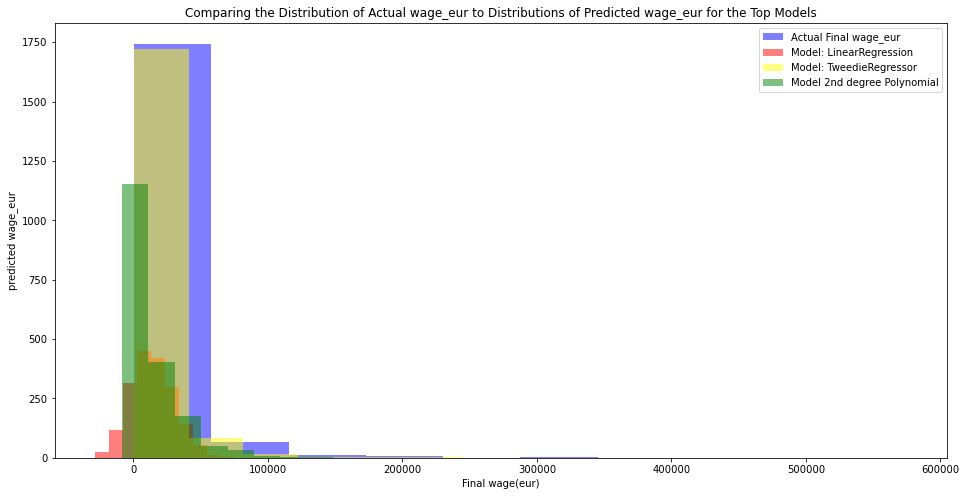

In [64]:
def actual_vs_predicted():
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    plt.hist(y_validate.wage_eur, color='blue', alpha=.5, label="Actual Final wage_eur")
    plt.hist(y_validate.wage_eur_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
    plt.hist(y_validate.wage_eur_pred_glm, color='yellow', alpha=.5, label="Model: TweedieRegressor")
    plt.hist(y_validate.wage_eur_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    plt.xlabel("Final wage(eur)")
    plt.ylabel("predicted wage_eur")
    plt.title("Comparing the Distribution of Actual wage_eur to Distributions of Predicted wage_eur for the Top Models")
    plt.legend()
    plt.show()
actual_vs_predicted()

In [65]:
y_train

wage_eur  wage_eur_pred_mean  wage_eur_pred_median  wage_eur_pred_lm  \
45220    3000.0        13745.802048                5000.0       3507.327495   
53483    1000.0        13745.802048                5000.0      -1553.901324   
49335    2000.0        13745.802048                5000.0       2734.356769   
44226   15000.0        13745.802048                5000.0      13187.800367   
50614     500.0        13745.802048                5000.0     -14608.145102   
...         ...                 ...                   ...               ...   
39397    7000.0        13745.802048                5000.0      21072.964529   
36858   50000.0        13745.802048                5000.0      45073.958012   
45768    2000.0        13745.802048                5000.0       2262.507285   
38509   50000.0        13745.802048                5000.0      28381.948757   
46047    7000.0        13745.802048                5000.0       5738.871201   

       lm_residuals  wage_eur_pred_lars  lars_residuals  wage_eur_pred_glm  \
45220    507.327495         2978.264518      -21.735482        3931.035154   
53483  -2553.901324        -1127.193991    -2127.193991        2442.091931   
49335    734.356769         2793.717047      793.717047        2941.690796   
44226  -1812.199633        14183.509193     -816.490807        8143.726575   
50614 -15108.145102       -14465.627436   -14965.627436         832.317023   
...             ...                 ...             ...                ...   
39397  14072.964529        22026.427373    15026.427373       13158.272028   
36858  -4926.041988        44723.085581    -5276.914419       56394.635688   
45768    262.507285         1856.647304     -143.352696        3693.819753   
38509 -21618.051243        27950.411064   -22049.588936       16974.354196   
46047  -1261.128799         5589.296052    -1410.703948        4798.563256   

       glm_residuals  wage_eur_pred_lm2  poly_residuals  
45220     931.035154       -2416.833539    -5416.833539  
53483    1442.091931        1670.305214      670.305214  
49335     941.690796       -2620.611935    -4620.611935  
44226   -6856.273425        3909.890128   -11090.109872  
50614     332.317023        9829.863209     9329.863209  
...              ...                ...             ...  
39397    6158.272028       14764.294981     7764.294981  
36858    6394.635688       63400.097151    13400.097151  
45768    1693.819753        1700.699339     -299.300661  
38509  -33025.645804       23506.255668   -26493.744332  
46047   -2201.436744         553.880247    -6446.119753  

[7325 rows x 11 columns]

In [66]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
        'r^2_validate': explained_variance_score(y_validate.wage_eur, y_validate.wage_eur_pred_mean)}])
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.wage_eur, y_validate.wage_eur_pred_lm)}, ignore_index=True)
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.wage_eur, y_validate.wage_eur_pred_lars)}, ignore_index=True)
metric_df = metric_df.append({
    'model': 'GLS (Poisson)', 
    'RMSE_validate': rmse_validate_glm,
    'r^2_validate': explained_variance_score(y_validate.wage_eur, y_validate.wage_eur_pred_glm)}, ignore_index=True)
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.wage_eur, y_validate.wage_eur_pred_lm2)}, ignore_index=True)

In [67]:
metric_df  

model  RMSE_validate  r^2_validate
0    mean_baseline   29613.837882      0.000000
1    OLS Regressor   22766.492989      0.345628
2    Lasso alpha 1   22764.150297      0.345764
3    GLS (Poisson)   15747.846520      0.687061
4  Quadratic Model   18417.019033      0.571936

In [68]:
y_test = pd.DataFrame(y_test)

# predict on test
y_test['wage_eur_pred_LINEAR'] = lm.predict(X_test_scaled)

# evaluate: rmse
rmse_test_lm = mean_squared_error(y_test.wage_eur, y_test.wage_eur_pred_LINEAR)**(1/2)

print("RMSE for OLS Model using LinearRegression\nOut-of-Sample Performance: ", rmse_test_lm)

y_test = pd.DataFrame(y_test)

# predict on test
y_test['wage_eur_pred_LASSO'] = lars.predict(X_test_scaled)

# evaluate: rmse
rmse_test_lars = mean_squared_error(y_test.wage_eur, y_test.wage_eur_pred_LASSO)**(1/2)

print("RMSE for OLS Model using Lasso\nOut-of-Sample Performance: ", rmse_test_lars)

y_test = pd.DataFrame(y_test)

#predict on test
y_test['pred_Poly'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.wage_eur, y_test.pred_Poly)**(0.5)

print(f"""
RMSE for Polynomial Regressor, degrees=2:
Test/Out-of-Sample Performance: {rmse_test}
""")



#predict on test
y_test['wage_eur_pred_glm'] = glm.predict(X_test_scaled)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.wage_eur, y_test.wage_eur_pred_glm)**(1/2)
print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)


RMSE for OLS Model using LinearRegression
Out-of-Sample Performance:  20588.66097972632
RMSE for OLS Model using Lasso
Out-of-Sample Performance:  20592.554774560605

RMSE for Polynomial Regressor, degrees=2:
Test/Out-of-Sample Performance: 16680.422984601642

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  21082.921819915504 
Validation/Out-of-Sample:  15747.846520315681


In [69]:
y_test

wage_eur  wage_eur_pred_LINEAR  wage_eur_pred_LASSO     pred_Poly  \
38519   20000.0          33539.582058         33807.998300  35192.280802   
47341     500.0           3246.260722          2717.967594  -4298.026896   
46834    8000.0          10366.016338         11093.243790  -6351.483917   
38051   30000.0          27739.503253         27657.002118  27510.752939   
39375   10000.0          18315.277885         18606.166188   8814.409509   
...         ...                   ...                  ...           ...   
37292   40000.0          20335.168298         22948.544736  27973.331265   
39425   20000.0          23493.668947         23686.699380  14724.254674   
53278     500.0         -12393.096394        -11691.826446   6909.823030   
48978    2000.0          -1629.120969         -1335.128739  -1790.674357   
49812    6000.0           6025.065692          5640.213098     79.001884   

       wage_eur_pred_glm  
38519       24344.816485  
47341        2792.455047  
46834        4610.964710  
38051       22404.098815  
39375        9851.160111  
...                  ...  
37292       19961.196450  
39425       16464.801147  
53278        1361.398835  
48978        2396.211795  
49812        3441.866258  

[1617 rows x 5 columns]

<AxesSubplot:>

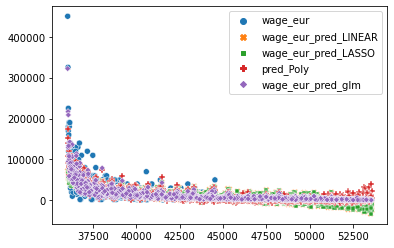

In [70]:
sns.scatterplot(data = y_test)